# Group 3 Runs without std consideration

In [1]:
from GA_optimiser import *
import os

In [2]:
grid_params = [0.001,0.01,0.0005]
lot_params = [100000,2000000,100000]
I_type = ['v','a']
lookback_params = [9,20,30,50,100,150,200]
scaling_factor_params = [1,5,0.5]

n_grid_params = ((grid_params[1]-grid_params[0])/grid_params[2])
n_lot_params = ((lot_params[1]-lot_params[0])/lot_params[2])
n_I_type_params = len(I_type)
n_lookback_params = len(lookback_params)
n_scaling_factor_params = ((scaling_factor_params[1]-scaling_factor_params[0])/scaling_factor_params[2])
print('number of grid params:-',(n_grid_params))
print('number of lot params:-',(n_lot_params))
print('number of I_type params:-',(n_I_type_params))
print('number of lookback params:-',(n_lookback_params))
print('number of scaling_factor params:-',(n_scaling_factor_params))
print('total_number_of_combinations:-',(n_grid_params*n_lot_params*n_I_type_params*n_lookback_params*n_scaling_factor_params))

parameters = [grid_params,lot_params,I_type,lookback_params,scaling_factor_params]

# Adjust these parameter according to search space
n_trials = 50 #NGEN
npop = 100
early_stopping_gen = n_trials # no early stopping
optimizer_param = [n_trials, npop, early_stopping_gen]

number of grid params:- 18.0
number of lot params:- 19.0
number of I_type params:- 2
number of lookback params:- 7
number of scaling_factor params:- 8.0
total_number_of_combinations:- 38304.0


In [3]:
gen_results('jan 2014','jan 2022',12,1,parameters=parameters,optimizer_param=optimizer_param)
gen_results('jan 2014','jan 2022',6,1,parameters=parameters,optimizer_param=optimizer_param)
gen_results('jan 2014','jan 2022',3,1,parameters=parameters,optimizer_param=optimizer_param)

Data gathered for training period:  01 Jan 2013 31 Dec 2013
Data gathered for testing period:  01 Jan 2014 31 Jan 2014
optimisation completed
Optimal parameters are:  [0.0065, 1400000, 'a', 200, 5.0]
Data gathered for training period:  01 Feb 2013 31 Jan 2014
Data gathered for testing period:  01 Feb 2014 28 Feb 2014
optimisation completed
Optimal parameters are:  [0.006, 1200000, 'a', 20, 3.0]
Data gathered for training period:  01 Mar 2013 28 Feb 2014
Data gathered for testing period:  01 Mar 2014 31 Mar 2014
optimisation completed
Optimal parameters are:  [0.009, 2000000, 'a', 9, 5.0]
Data gathered for training period:  01 Apr 2013 31 Mar 2014
Data gathered for testing period:  01 Apr 2014 30 Apr 2014
optimisation completed
Optimal parameters are:  [0.009, 1600000, 'v', 150, 4.0]
Data gathered for training period:  01 May 2013 30 Apr 2014
Data gathered for testing period:  01 May 2014 31 May 2014
optimisation completed
Optimal parameters are:  [0.0095, 2000000, 'a', 20, 3.5]
Data ga

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def Profit_Analysis(currency_pair='EURUSD',type ='profit',split='3-1'):
    folder_path = f"results/{currency_pair}/{type}/"
    files = [f for f in os.listdir(folder_path) if f.startswith(split)]
    optimal_file = [f for f in files if f.endswith('optimal.csv')][0]
    test_file = [f for f in files if f.endswith('test.csv')][0]
    train_file = [f for f in files if f.endswith('train.csv')][0]
    optimal_df = pd.read_csv(os.path.join(folder_path, optimal_file),index_col=0)
    test_df = pd.read_csv(os.path.join(folder_path, test_file),index_col=0)
    train_df = pd.read_csv(os.path.join(folder_path, train_file),index_col=0)
    
    for col in optimal_df.columns:
        plt.figure(figsize=(10,5))
        plt.hist(optimal_df[col],bins = min(20,len(optimal_df[col].unique())),align='mid',)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.show()
        
    for col in optimal_df.columns:
        plt.figure(figsize=(20,5))
        plt.plot(optimal_df[col])
        plt.xticks(rotation=90)
        plt.title(col)
        plt.show()

    plt.figure(figsize=(20,5))
    colour_set = ['red','green']
    columns = ['profit','max_loss']
    for col in columns:
        plt.bar(train_df.index,train_df[col],alpha = 0.6,color = colour_set.pop())
    plt.xticks(rotation=90)
    plt.legend(columns)
    plt.show()
    
    plt.figure(figsize=(20,5))
    colour_set = ['red','green']
    columns = ['profit','max_loss']
    for col in columns:
        plt.bar(test_df.index,test_df[col],alpha = 0.6,color = colour_set.pop())
    plt.xticks(rotation=90)
    plt.legend(columns)
    plt.show()
    
    

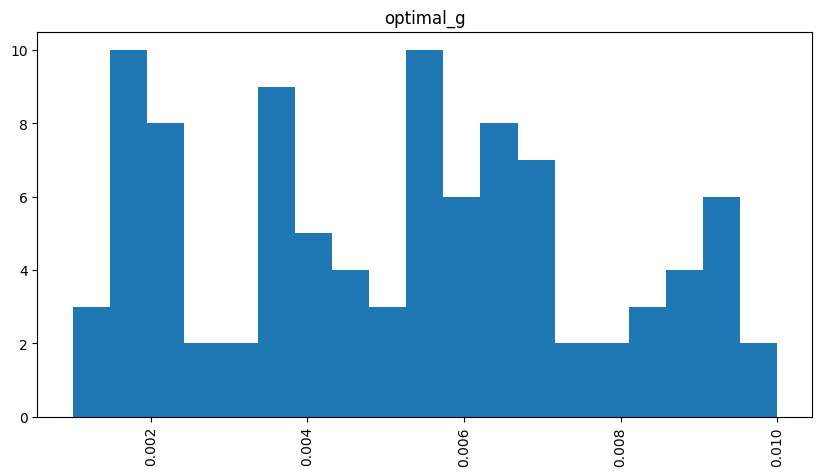

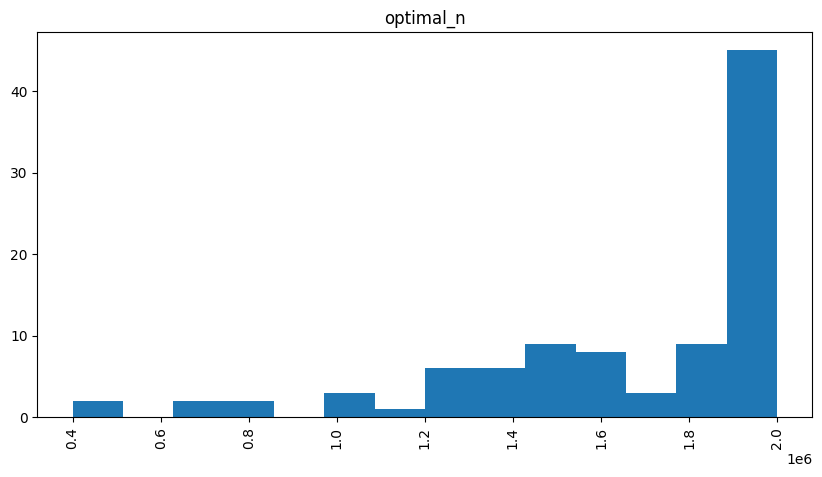

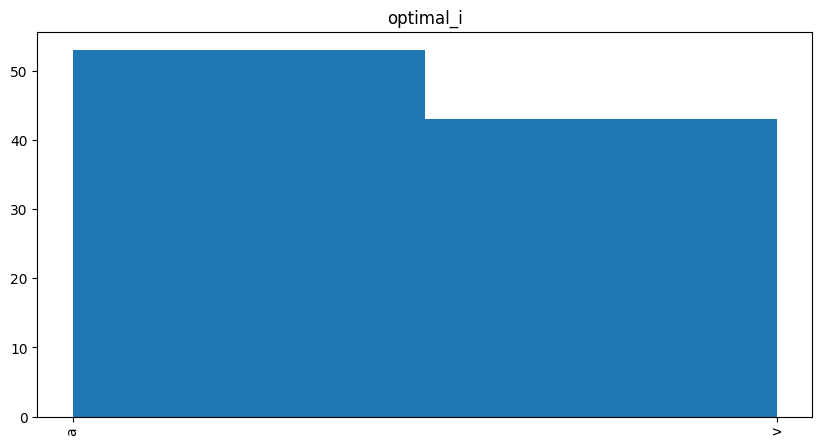

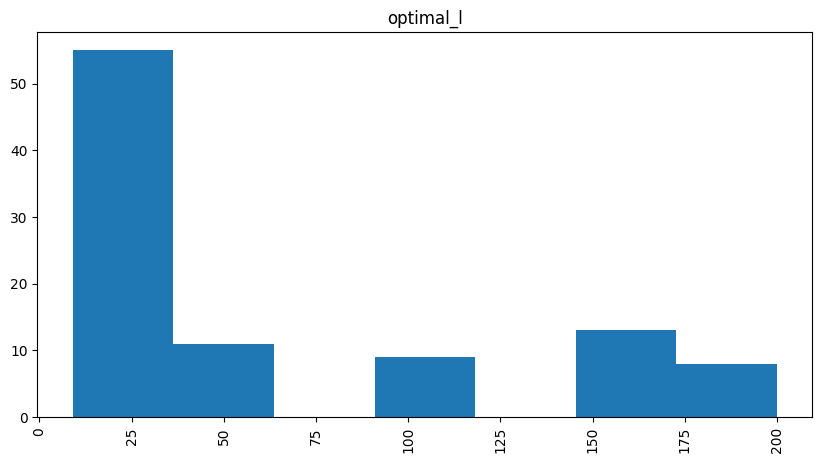

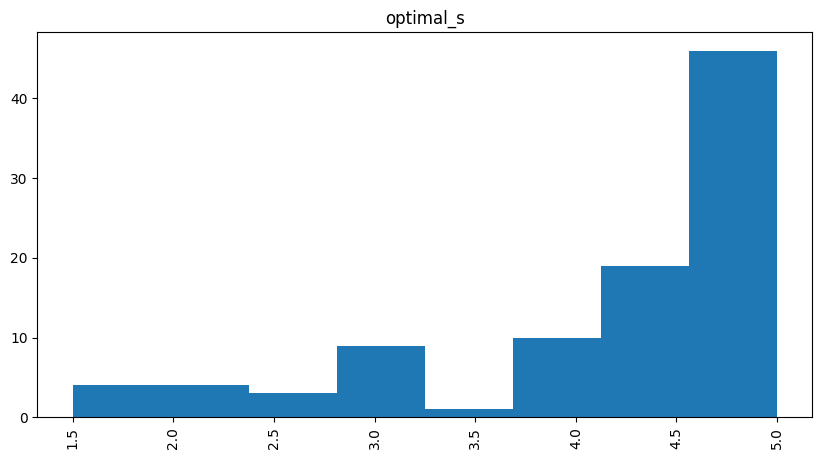

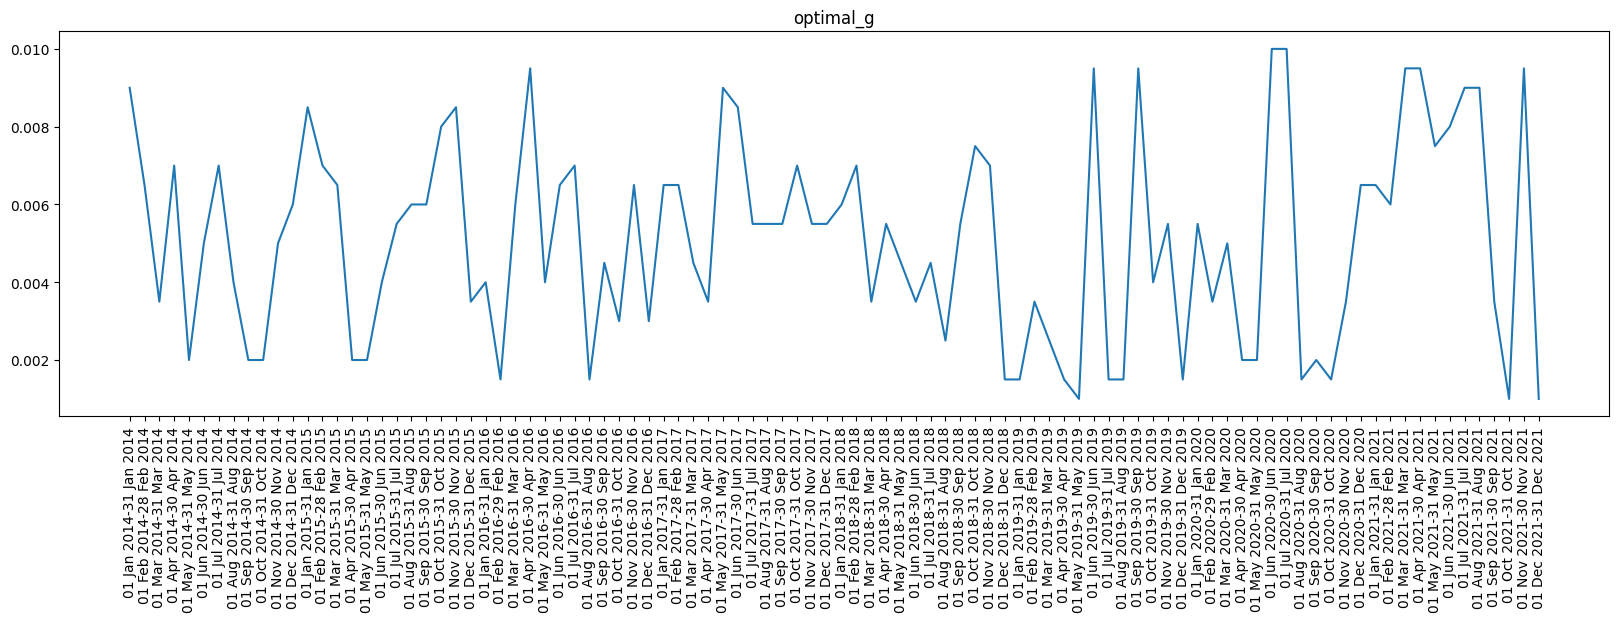

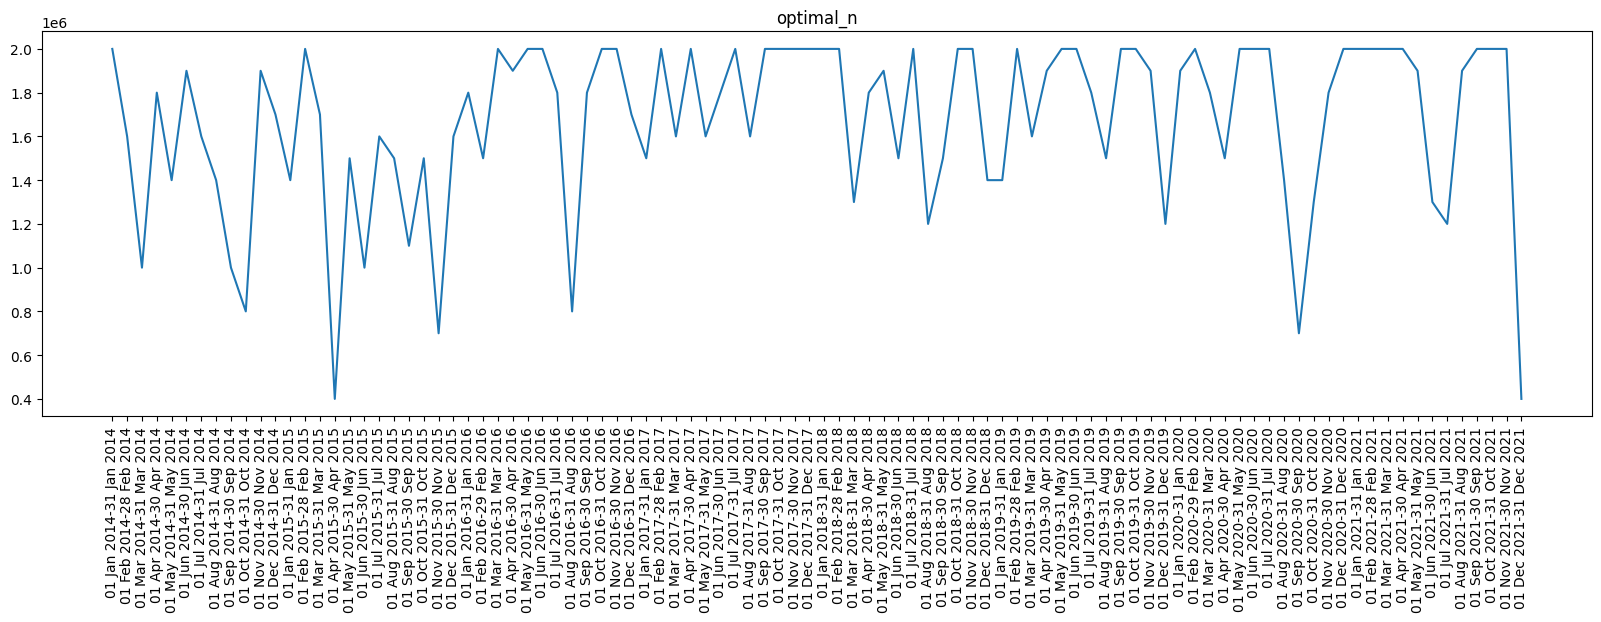

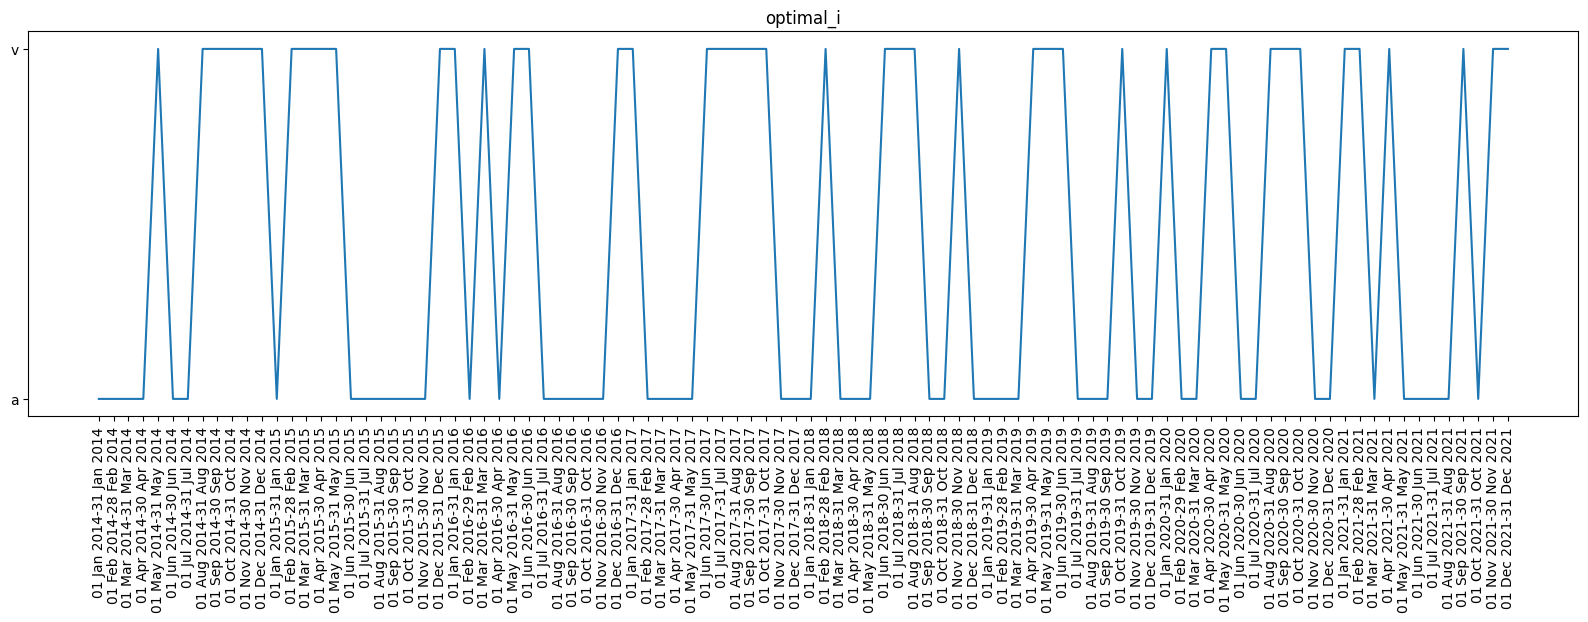

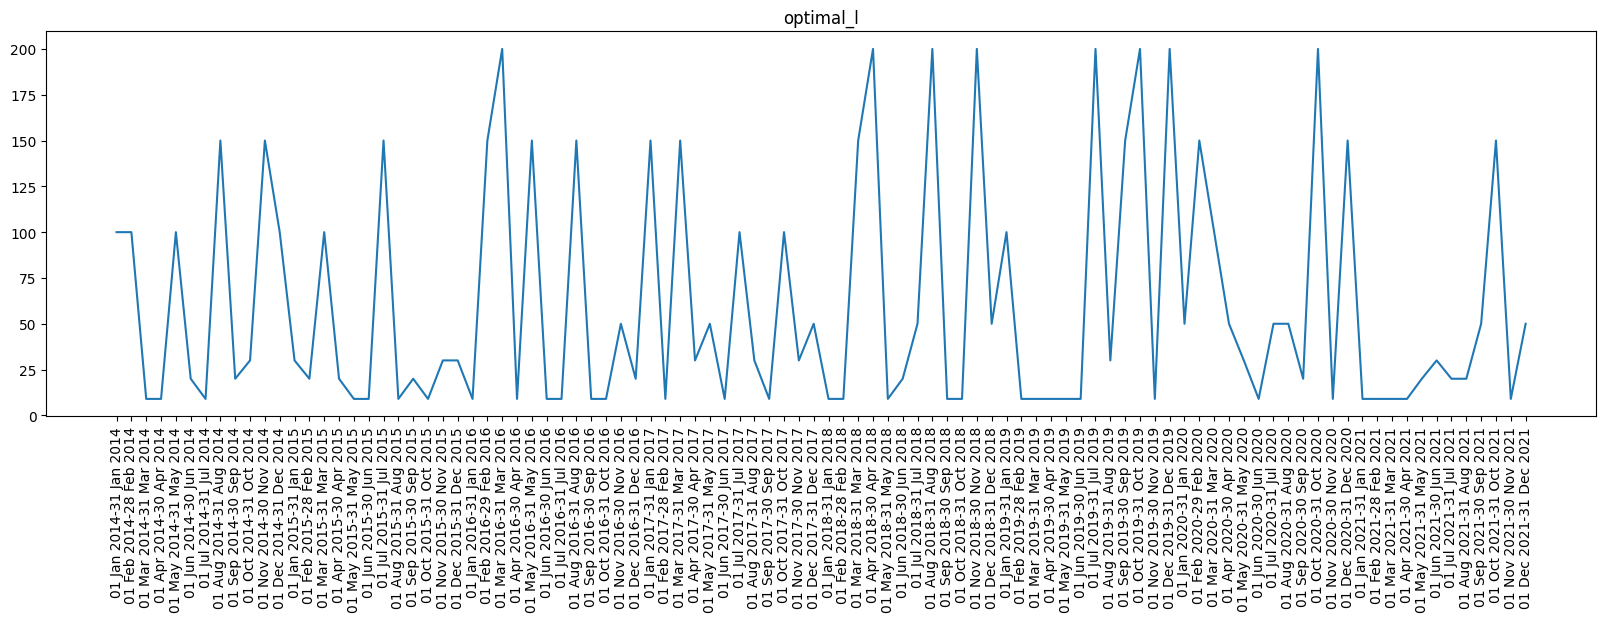

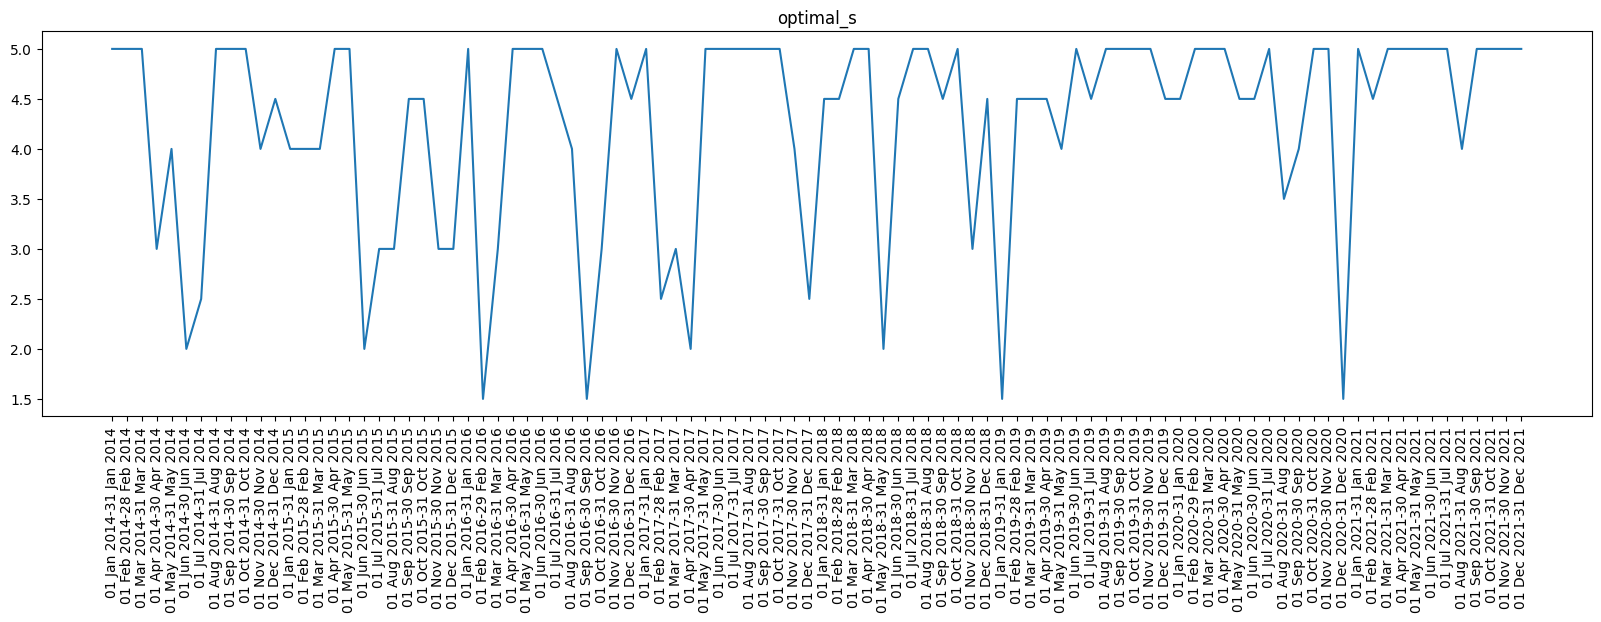

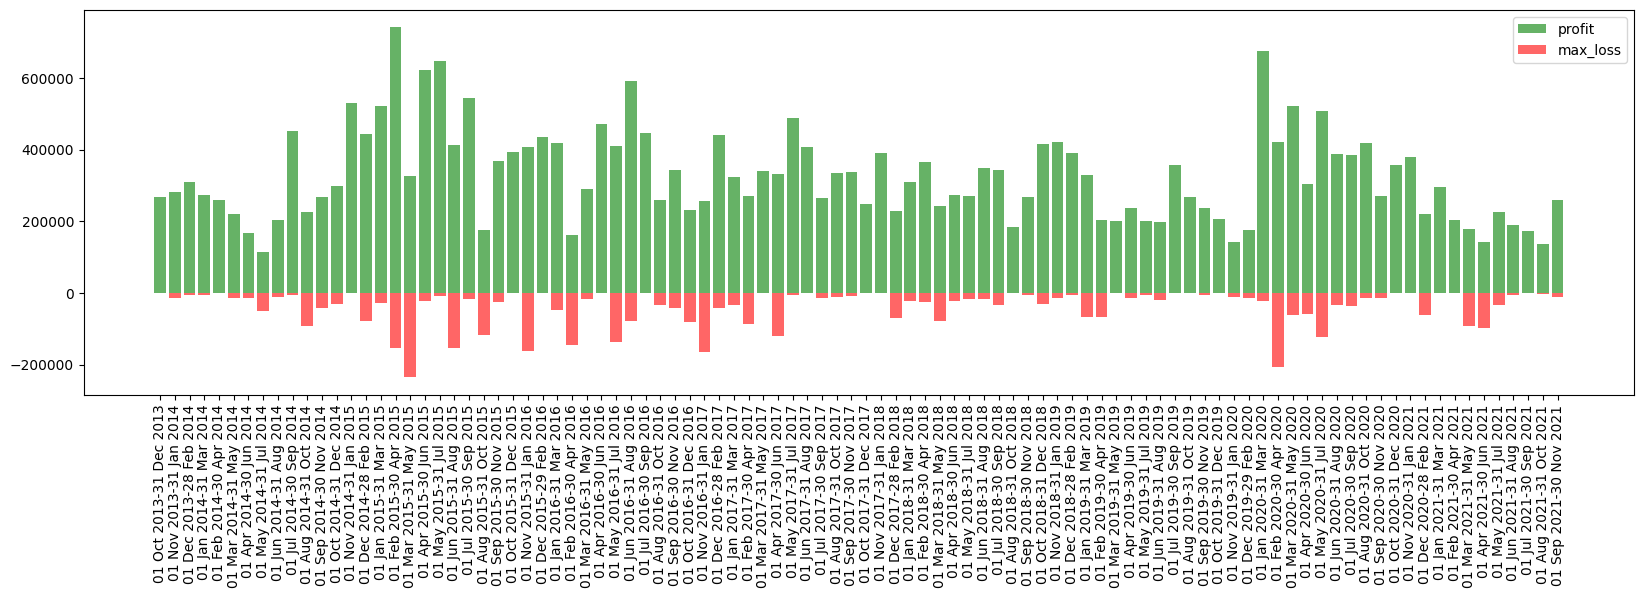

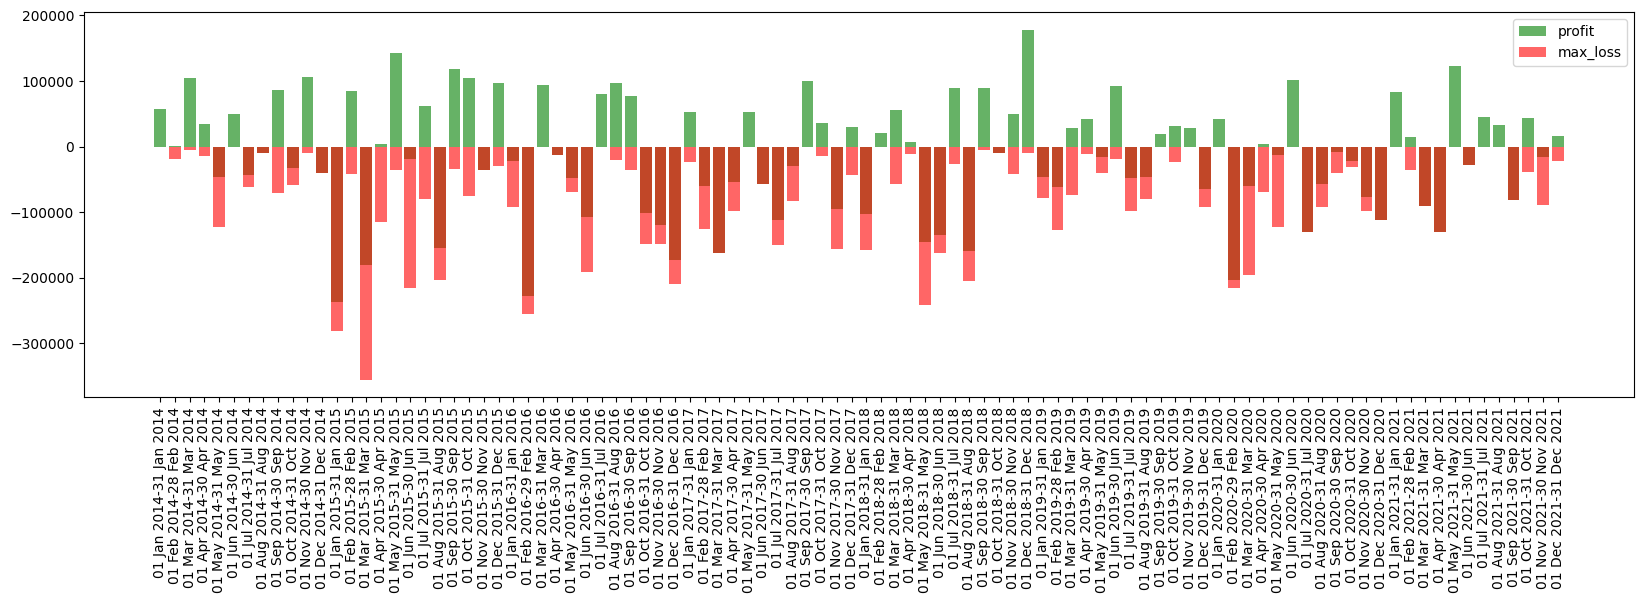

In [31]:
Profit_Analysis(currency_pair='EURUSD', split='3-1')
Profit_Analysis(currency_pair='EURUSD', split='6-1')
Profit_Analysis(currency_pair='EURUSD', split='12-1')